## scikit-learn
* `sklearn.tree.DecisionTreeClassifier`
    * criterion : {'gini'*, 'entropy'} 
* ```
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X,y)
```
* `export_grahpviz()` 함수로 시각화가능 파일 생성
* sckit-lean은 이진트리 CART 알고리즘 사용
    *leaf node외 모든 노드의 자식노드는 2개
* 노드 속성
    * samples : 노드에 속한 샘플의 수
    * value : 각 클래스에 속한 샘플의 수


## 모듈 설치
* pydot
    * pip install pydot
* grphviz
    * 실행파일 설치 : https://graphviz.gitlab.io/download/
    * pip install graphviz

In [1]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
import pydot
#from IPython import display
import graphviz

# Decision Tree 예제
## dataset
몸매, 얼굴, 결혼 여부로 사귀고 싶은 사람을 분류하는 예제

![](https://3.bp.blogspot.com/-U75Jldiz09I/V6iqkRG4R3I/AAAAAAAAFao/GunRfJYuPkoebsRaaHZgy0A4zgVmuki7QCLcB/w1200-h630-p-k-no-nu/Up%2BFor%2BLove%2Bpromo.jpg)
![](https://i.pinimg.com/736x/41/f3/c6/41f3c6fb4fb4d18277495c41af85cf8d--odd-couples-happy-couples.jpg)

몸매 | 얼굴 | 미혼| 이상형
---|---|---|---
yes | yes | yes| yes
yes | yes | no| no
no | no | yes | no
no| yes|yes | no
yes|yes|no|no
yes |no|yes| no
no|no|yes|no
no| yes| no| no

## 알고리즘
* ID3 Root Node
    * 클래스 이상형의 엔트로피 :$ E(이상형)= E(1^+, 7^-) = -\frac{1}{8}log2(\frac{1}{8}) - \frac{7}{8}log2(\frac{7}{8}) \approx 0.543$
        * $IG(이상형, 몸매) = E(이상형) - E(이상형, 몸매) = 0.543 - \frac{4}{8} E(1^+,3^-) + \frac{4}{8} E(0^+, 4^-) = 0.138  $
        * $IG(이상형, 얼굴) = E(이상형) - E(이상형, 얼굴) = 0.543 - \frac{5}{8} E(1^+,4^-) + \frac{3}{8} E(0^+, 3^-) = 0.093  $
        * $IG(이상형, 미혼) = E(이상형) - E(이상형, 미혼) = 0.543 - \frac{4}{8} E(1^+,4^-) + \frac{3}{8} E(0^+, 3^-) = 0.093  $
    * 몸매를 root node로 선정
    
* CART Root Node
    * $J(몸매, 0.5) = \frac{4}{8}G(4,0) + \frac{4}{8}G(3,1) = 0 + \frac{4}{8}(1- \frac{3}{4}^2 - \frac{1}{4}^2) = 0.1875 $ 선정
    * $J(얼굴, 0.5) = \frac{5}{8}G(4,1) + \frac{3}{8}G(3,0) = \frac{5}{8}(1- \frac{4}{5}^2 - \frac{1}{5}^2)  + 0= 0.1993 $
    * $J(미혼, 0.5) = \frac{5}{8}G(4,1) + \frac{3}{8}G(3,0) = \frac{5}{8}(1- \frac{4}{5}^2 - \frac{1}{5}^2)  + 0= 0.1993 $
    

# 결정 트리 이상형 예제(entropy)

[[1 1 1]
 [1 1 0]
 [0 0 1]
 [0 1 1]
 [1 1 0]
 [1 0 1]
 [0 0 1]
 [0 1 0]] [1 0 0 0 0 0 0 0]
Train Accurray:  1.0


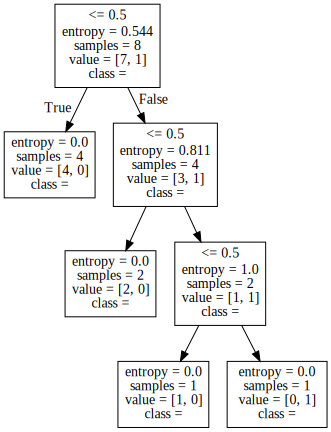

[1]
[0]
[0]
[0]
[0]


In [2]:
data = np.array([[1,1,1,1],
                 [1,1,0,0],
                 [0,0,1,0],
                 [0,1,1,0],
                 [1,1,0,0],
                 [1,0,1,0],
                 [0,0,1,0],
                 [0,1,0,0]])

X = data[:, :-1]
y = data[:, -1]
print(X, y)

tree_ent = DecisionTreeClassifier(criterion='entropy')
tree_ent.fit(X,y)
print("Train Accurray: ", tree_ent.score(X, y))
dot_data = StringIO()
export_graphviz(tree_ent,
                out_file=dot_data,
                feature_names=["몸매", "얼굴", "미혼"],
                class_names=["폭탄", "이상형"])
graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]
display(graphviz.Source(graph))

print(tree_ent.predict([[1,1,1]]))
print(tree_ent.predict([[0,1,1]]))
print(tree_ent.predict([[1,0,1]]))
print(tree_ent.predict([[1,1,0]]))
print(tree_ent.predict([[0,0,0]]))

# 결정 트리 이상형 예제( Jini)

[[1 1 1]
 [1 1 0]
 [0 0 1]
 [0 1 1]
 [1 1 0]
 [1 0 1]
 [0 0 1]
 [0 1 0]] [1 0 0 0 0 0 0 0]
Train Accurray:  1.0


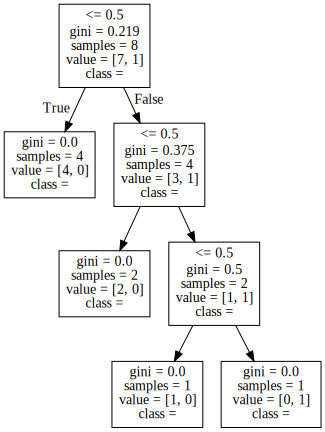

[1]
[0]
[0]
[0]
[0]


In [3]:
# 하드 코딩한 샘플과 sklearn으로 DT 예제 및 시각화 예제
# 사귀고 싶은 이상형 찾기
# 특성 : 몸매, 얼굴, 미혼, 이상형
data = np.array([[1,1,1,1],
                 [1,1,0,0],
                 [0,0,1,0],
                 [0,1,1,0],
                 [1,1,0,0],
                 [1,0,1,0],
                 [0,0,1,0],
                 [0,1,0,0]])

X = data[:, :-1]
y = data[:, -1]
print(X, y)

tree_jini = DecisionTreeClassifier(random_state=0)
tree_jini.fit(X,y)
print("Train Accurray: ", tree_jini.score(X, y))

'''
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data)
dot_data.getvalue()

graph = pydot.graph_from_dot_data(dot_data.getvalue())
print( '"graph" is object of type {}'.format(type(graph[0])), graph[0].create_png())

display.Image(graph[0].create_png())
'''
'''
export_graphviz(tree,
                out_file="./father_tree.dot",
        feature_names=["gender", "marrage", "children"],
        class_names=["Mail", "single", "father"],
        rounded=True,
        filled=True )
with open("father_tree.dot") as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))
    #dot = graphviz.Source(dot_graph)
    #dot.format = 'png'
    #dot.render(filename='father_tree.png', directory='./', cleanup=True)
    #dot
'''

dot_data = StringIO()
export_graphviz(tree_jini,
                out_file=dot_data,
                feature_names=["몸매", "얼굴", "미혼"],
                class_names=["폭탄", "이상형"],)
graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]
display(graphviz.Source(graph))

print(tree_jini.predict([[1,1,1]]))
print(tree_jini.predict([[0,1,1]]))
print(tree_jini.predict([[1,0,1]]))
print(tree_jini.predict([[1,1,0]]))
print(tree_jini.predict([[0,0,0]]))


## 유방암 예제, DT

In [4]:
def plot_feature_importance(dataset, model):
    n = len(dataset.feature_names)
    plt.barh(range(n), model.feature_importances_, align='center')
    plt.yticks(np.arange(n), dataset.feature_names)
    plt.xlabel("feature importance")
    plt.ylabel('features')
    plt.show()
    

Train Accuracy(depth=0): 100.000%
Test Accuracy(depth=0): 93.706%
feature importance: [0.         0.00752597 0.         0.         0.00903116 0.
 0.00752597 0.         0.         0.         0.00975731 0.04630969
 0.         0.00238745 0.00231135 0.         0.         0.
 0.         0.00668975 0.69546322 0.05383211 0.         0.01354675
 0.         0.         0.01740312 0.11684357 0.01137258 0.        ]
Train Accuracy(depth=4): 98.826%
Test Accuracy(depth=4): 95.105%
feature importance: [0.         0.00752597 0.         0.         0.00903116 0.
 0.00752597 0.         0.         0.         0.00975731 0.04630969
 0.         0.00238745 0.00231135 0.         0.         0.
 0.         0.00668975 0.69546322 0.05383211 0.         0.01354675
 0.         0.         0.01740312 0.11684357 0.01137258 0.        ]


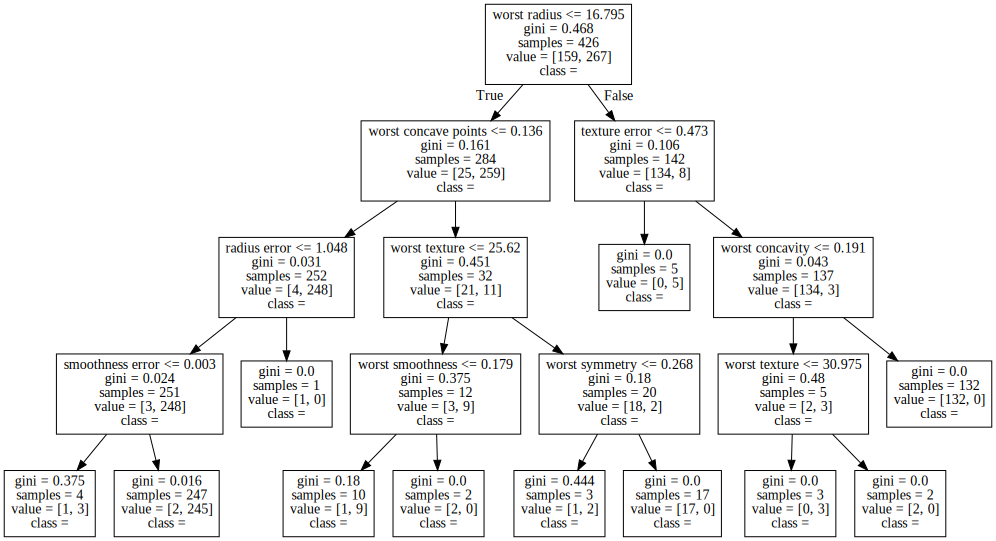

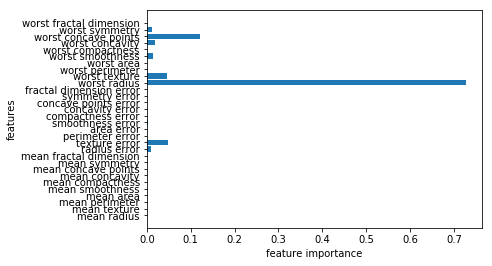

In [5]:
# 분류 예제 , sklearn 책의 유방암 p106
from sklearn import model_selection
from sklearn import datasets

def cancer_lab(depth=0):
    random_state = 0
    cancer = datasets.load_breast_cancer()
    X_train, X_test, y_train, y_test = model_selection.train_test_split(cancer.data,
                                                        cancer.target,
                                                        stratify=cancer.target,
                                                        random_state=42
                                                        )
    
    if depth == 0:
        tree = DecisionTreeClassifier(random_state=random_state)
    else :
        tree = DecisionTreeClassifier(random_state=random_state, max_depth=4) 
    tree.fit(X_train, y_train)
    print('Train Accuracy(depth=%d): %.3f%%'%(depth, tree.score(X_train, y_train)*100))
    print('Test Accuracy(depth=%d): %.3f%%'%(depth, tree.score(X_test, y_test)*100))

    return tree, cancer

# max_depth를 지정한 것이 훈련 정확도는 낮지만, 테스트 정확도가 높다
tree1, cancer = cancer_lab() 
print("feature importance:", tree1.feature_importances_)
tree2, cancer = cancer_lab(4)
print("feature importance:", tree1.feature_importances_)

dot_data = StringIO()
export_graphviz(tree2,
               out_file=dot_data,
               feature_names=cancer.feature_names,
               class_names=['악성', '양성'])
graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]
display(graphviz.Source(graph))

plot_feature_importance(cancer, tree2)


## scikit-learn 구현
* sklearn.ensemble.Votingclassifier
    * `estimator=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)]`
    * `votion='hard`
* sklearn.ensemble.BaggingClassifier
    * bootstrap
        * True : 배깅
        * False : 페이스팅
    * n_jobs=1 : 사용할 CPU 코어수, -1:최대한
* `sklearn.ensemble.RandomforestClassifier`
    * n_estimators : 생성할 트리의 갯수, 클수록 좋지만 훈련시간과 메모리 부담
        * 생성된 트리는 객체의 `estimator_` 속성에
    * random_state : 생성할 때 마다 달라 질수 있으므로 같은 결과를 원하면 값을 고정
    * max_fatures : 선택할 무작위 특성의 갯수, 핵심 변수, 기본값을 권장
        * 값이 크면 : 트리들이 비슷해짐
        * 값이 작으면 : 트리들이 달라지고 깊어진다.
*  sklearn.ensemble.GradientBoostingclassfier
    

# 유방암 예제 , random forest

In [6]:
# 책 intro_ml p119

from sklearn import model_selection
from sklearn import ensemble
from sklearn import datasets

cancer = datasets.load_breast_cancer()
X_train, X_test, y_train, y_test = model_selection.train_test_split(cancer.data,
                                                        cancer.target,
                                                        random_state=0)

forest = ensemble.RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print('Train Accuracy: %.3f%%'%(forest.score(X_train, y_train)*100))
print('Test Accuracy: %.3f%%'%( forest.score(X_test, y_test)*100))

Train Accuracy: 100.000%
Test Accuracy: 97.203%


# 숫자 손글씨

In [18]:
import numpy as np, cv2
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import ensemble
import matplotlib.pyplot as plt

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0, test_size=0.3)

#tree = DecisionTreeClassifier(criterion='entropy')
tree = ensemble.RandomForestClassifier(n_estimators=100, random_state=0)
tree.fit(X_train,y_train)

print("Train Accuracy :", tree.score(X_train, y_train))
print("Test Accuracy1 :", tree.score(X_test, y_test))


Train Accuracy : 1.0
Test Accuracy1 : 0.9777777777777777


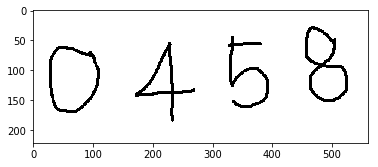

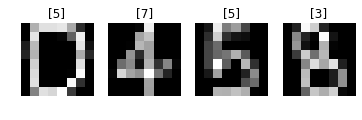

In [19]:
import img2data

image = cv2.imread('./img/0458.png')
plt.imshow(image)
plt.show()
numbers = img2data.img2digits(image, (8,8))
for i, n in enumerate(numbers):
    pred = tree.predict(n/255 * 16)
    plt.subplot(1, len(numbers), i+1)
    plt.title(str(pred))
    plt.imshow(n.reshape(8,8), cmap="gray")
    plt.axis("off")